# ***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from typing import List, Tuple
from data_augmentation import Geometric_Augmentations

In [3]:
PATH = './DataSet/Fish_Dataset'
labels = [entry.name for entry in os.scandir(PATH) if entry.is_dir()]
labels

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [4]:
fish_id = [id.name for id in os.scandir(f'{PATH}/{labels[0]}/{labels[0]}')]
fish_id

['00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '00071.png',
 '0007

In [5]:
def plot_image(image_path: str) -> None:
    """
    Display an image from the given file path using OpenCV and Matplotlib.

    Args:
        image_path (str): The path to the image file.

    Returns:
        None

    Raises:
        Exception: If there is an error reading or displaying the image.
    """
    try:
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()
    except Exception as error:
        print(f"Error: {error}")


In [6]:
def get_images_path(base_path: str, labels_list: List[str], ids_list: List[str]) -> Tuple[List[str], List[str], List[str]]:
    """
    Generate lists of image and mask file paths along with corresponding labels.

    Args:
        base_path (str): The base directory containing subdirectories for labels.
        labels_list (List[str]): List of label names (directory names).
        ids_list (List[str]): List of image file names within each label directory.

    Returns:
        Tuple[List[str], List[str], List[str]]: A tuple containing lists of image file paths,
        mask file paths, and corresponding labels.
    """
    images_path = []
    masks_path = []
    labels = []

    for label in labels_list:
        for id in ids_list:
            image_path = f"{base_path}/{label}/{label}/{id}"
            mask_path = f"{base_path}/{label}/{label} GT/{id}"
            
            images_path.append(image_path)
            masks_path.append(mask_path)
            labels.append(label)

    return images_path, masks_path, labels

In [7]:
images_path, masks_path, labels = get_images_path(PATH, labels, fish_id)

data = {
    'label': labels,
    'image_path': images_path,
    'mask_path': masks_path
}

dataframe = pd.DataFrame(data)


In [8]:
display(dataframe)

,label,image_path,mask_path
0,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
1,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
2,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
3,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
4,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
...,...,...,...
8995,Trout,./DataSet/Fish_Dataset/Trout/Trout/00996.png,./DataSet/Fish_Dataset/Trout/Trout GT/00996.png
8996,Trout,./DataSet/Fish_Dataset/Trout/Trout/00997.png,./DataSet/Fish_Dataset/Trout/Trout GT/00997.png
8997,Trout,./DataSet/Fish_Dataset/Trout/Trout/00998.png,./DataSet/Fish_Dataset/Trout/Trout GT/00998.png
8998,Trout,./DataSet/Fish_Dataset/Trout/Trout/00999.png,./DataSet/Fish_Dataset/Trout/Trout GT/00999.png


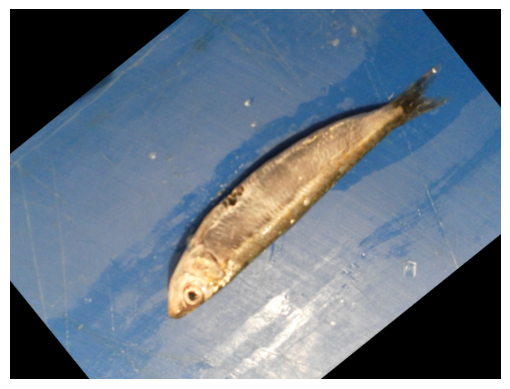

In [12]:
i = 10
path = dataframe.loc[10, 'image_path']
plot_image(path)

In [ ]:
def preprocess_image_and_mask(image_path: str, mask_path: str, target_size: tuple) -> Tuple[Tensor, Tensor]:

    # Read and decode the input image
    image_data = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image_data, channels=3)

    # Read and decode the mask image
    mask_data = tf.io.read_file(mask_path)
    mask = tf.image.decode_jpeg(mask_data, channels=1)

    # Resize the image and mask to the target size
    image = tf.image.resize(image, target_size)
    mask = tf.image.resize(mask, target_size)

    # Normalize the image to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    # Binarize the mask
    mask = tf.math.sign(mask)

    return image, mask
